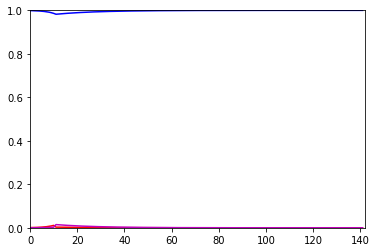

     xPlots    wPlots    dPlots    hPlots
0         0  0.999000  0.001000  0.000000
1         1  0.998600  0.001120  0.000280
2         2  0.998194  0.001445  0.000361
3         3  0.997671  0.001864  0.000466
4         4  0.996995  0.002404  0.000600
5         5  0.996124  0.003101  0.000774
6         6  0.995001  0.004000  0.000999
7         7  0.993552  0.005160  0.001287
8         8  0.991684  0.006656  0.001660
9         9  0.989275  0.008585  0.002139
10       10  0.986170  0.011074  0.002756
11       11  0.982167  0.003098  0.014735
12       12  0.983157  0.002923  0.013921
13       13  0.984092  0.002757  0.013151
14       14  0.984976  0.002601  0.012422
15       15  0.985812  0.002454  0.011734
16       16  0.986602  0.002315  0.011082
17       17  0.987349  0.002184  0.010467
18       18  0.988055  0.002060  0.009885
19       19  0.988721  0.001944  0.009335
20       20  0.989351  0.001834  0.008815
21       21  0.989947  0.001730  0.008323
22       22  0.990509  0.001632  0

-3.4459167266545947

In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation_iE(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    fW=simData['fW']
    fD=simData['fD']
    a=simData['a']
    if simData['curGen']<=simData['induceStart']:
        e=simData['e']
    else:
        e=a*simData['eP']+(1-a)*simData['e']
    #manuscript equations
    #variables to prevent redundant multiplication
    w2=(qW*fW)**2
    wd=qW*fW*qD*fD
    wh=qW*fW*qH*(1-(1-fD)*d)
    d2=(qD*fD)**2
    dh=qD*fD*qH*(1-(1-fD)*d)
    h2=(qH*(1-(1-fD)*d))**2
    
    #expected total frquency after loss from fitness
    #xBar=(1-qW*sW-qD*sD-qH*sD*d)**2
    fBar=(qW*fW+qD*fD+qH*(1-(1-fD)*d))**2

    qWP=(w2+wh+.25*h2)/fBar
    qDP=(e*(2*wd+wh+dh+.5*h2)+d2+dh+.25*h2)/fBar
    qHP=((1-e)*(2*wd+wh+dh+.5*h2))/fBar
    
    #catch float multiplication rounding errors
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}

def run_simulation_iE(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iE(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0


simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.7,'e':.8,'d':.5,'eP':.1,'a':.9,'generations':1000,'induceStart':10}
run_simulation_iE(simData,True,True)

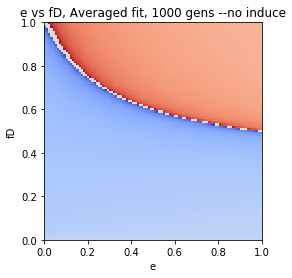

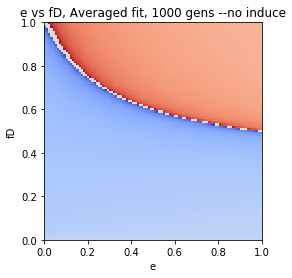

In [3]:
eVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(eVals,yVals)
Z=np.zeros((len(eVals),len(yVals)))
#run 2D sim e vs f
for eIndex in range(len(eVals)):
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':yVals[yIndex],'d':.5,'e':eVals[eIndex],'d':.5,'a':0,'eP':.1,'generations':1000,'induceStart':10}
        takeover=run_simulation_iE(simData)
        Z[yIndex,eIndex]=takeover
model3D(X,Y,Z,'e','fD','e vs fD, Averaged fit, 1000 gens --no induce')

eVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(eVals,yVals)
Z=np.zeros((len(eVals),len(yVals)))
#run 2D sim e vs f
for eIndex in range(len(eVals)):
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':yVals[yIndex],'d':.5,'e':eVals[eIndex],'d':.5,'a':0,'eP':.1,'generations':1000,'induceStart':10}
        takeover=run_simulation_iE(simData)
        Z[yIndex,eIndex]=takeover
model3D(X,Y,Z,'e','fD','e vs fD, Averaged fit, 1000 gens --no induce')

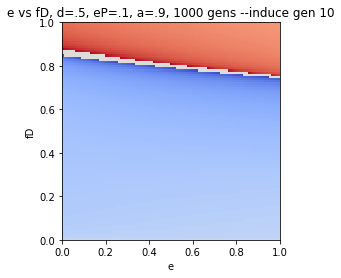

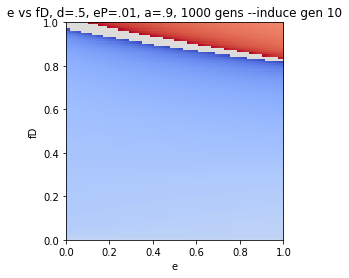

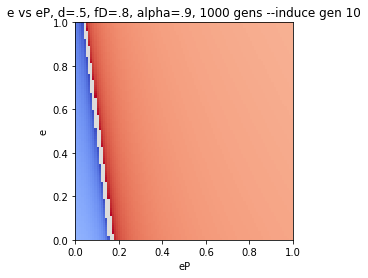

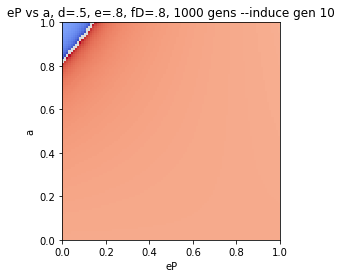

In [4]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':yVals[yIndex],'d':.5,'e':xVals[xIndex],'eP':.1,'a':.9,'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'e','fD','e vs fD, d=.5, eP=.1, a=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e
    for yIndex in range(len(yVals)):
        #y is f
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':yVals[yIndex],'d':.5,'e':xVals[xIndex],'eP':.01,'a':.9,'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'e','fD','e vs fD, d=.5, eP=.01, a=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e'
    for yIndex in range(len(yVals)):
        #y is e
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'e':yVals[yIndex],'eP':xVals[xIndex],'a':.9,'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eP','e','e vs eP, d=.5, fD=.8, alpha=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is e'
    for yIndex in range(len(yVals)):
        #y is alpha
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'e':.8,'eP':xVals[xIndex],'a':yVals[yIndex],'generations':1000,'induceStart':10}
        
        takeover=run_simulation_iE(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eP','a','eP vs a, d=.5, e=.8, fD=.8, 1000 gens --induce gen 10')

eP: 0


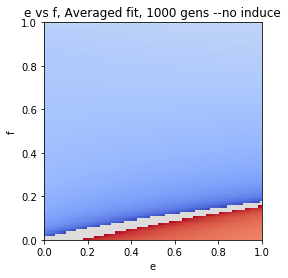

eP: 1


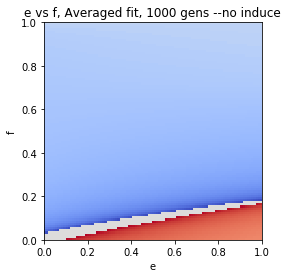

eP: 2


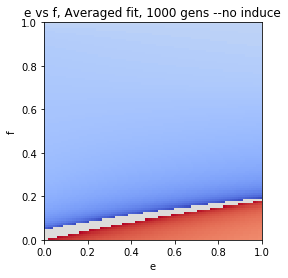

eP: 3


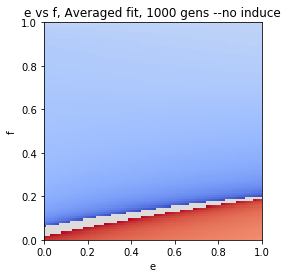

eP: 4


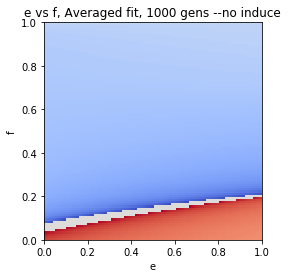

eP: 5


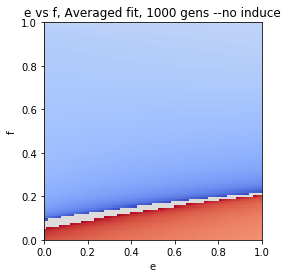

eP: 6


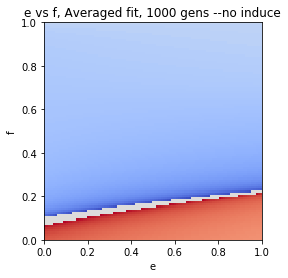

eP: 7


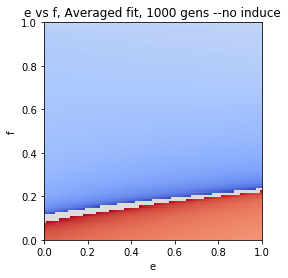

eP: 8


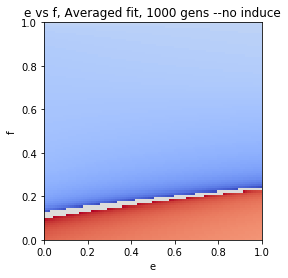

eP: 9


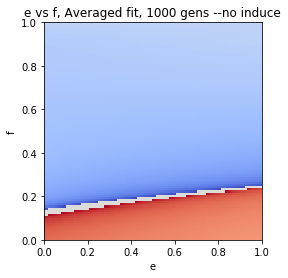

eP: 10


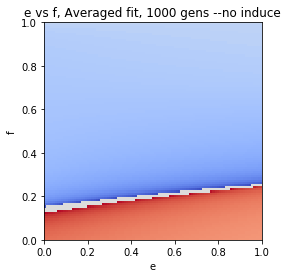

eP: 11


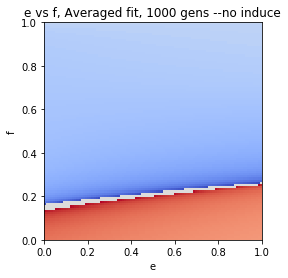

eP: 12


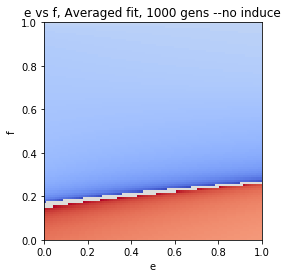

eP: 13


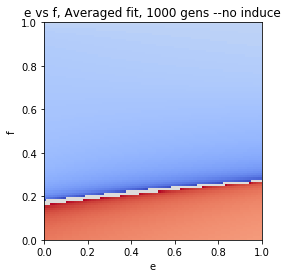

eP: 14


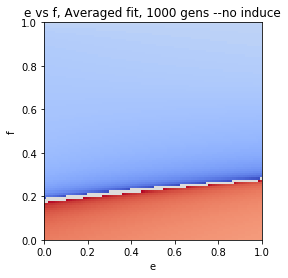

eP: 15


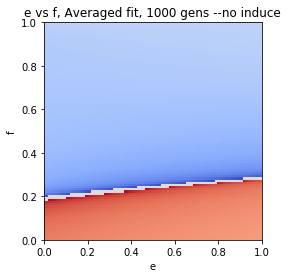

eP: 16


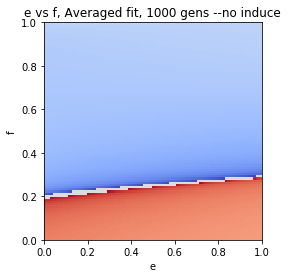

eP: 17


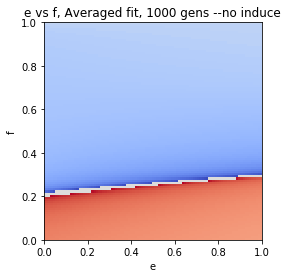

eP: 18


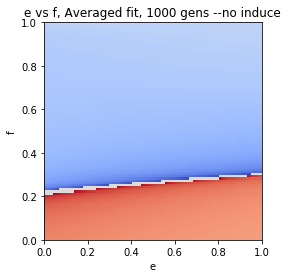

eP: 19


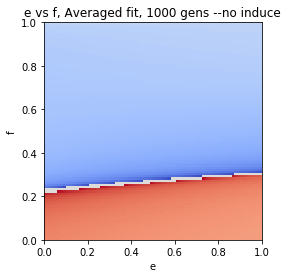

eP: 20


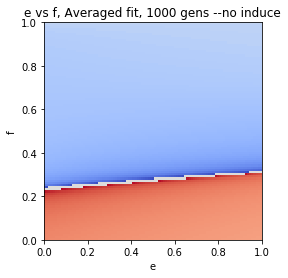

eP: 21


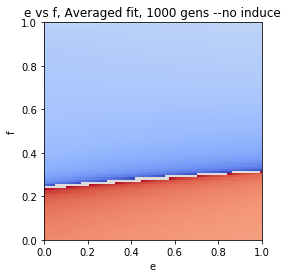

eP: 22


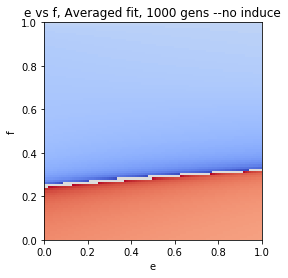

eP: 23


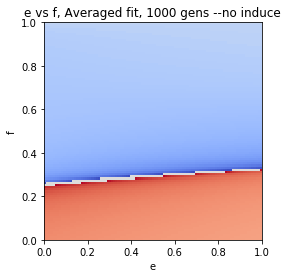

eP: 24


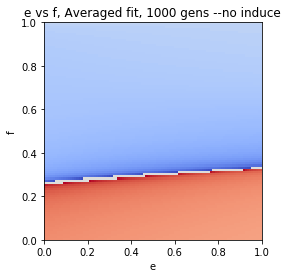

eP: 25


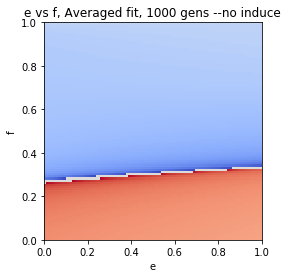

eP: 26


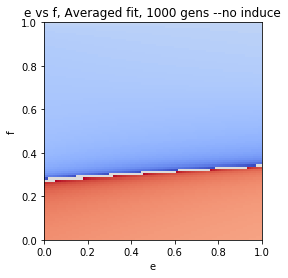

eP: 27


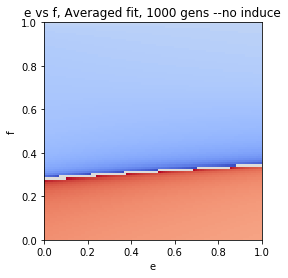

eP: 28


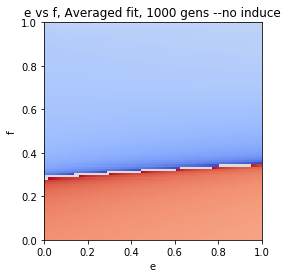

eP: 29


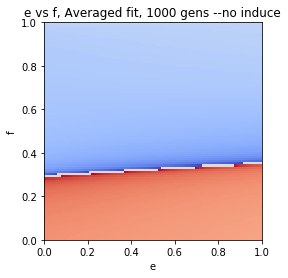

eP: 30


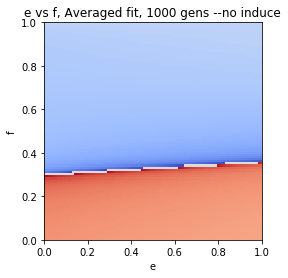

eP: 31


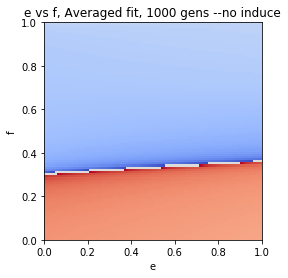

eP: 32


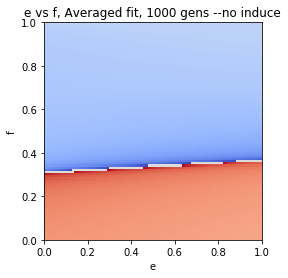

eP: 33


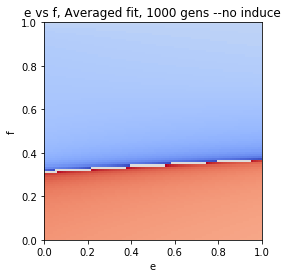

eP: 34


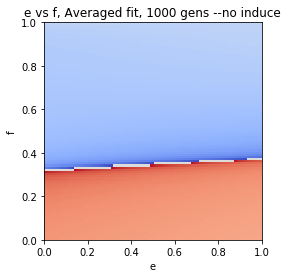

eP: 35


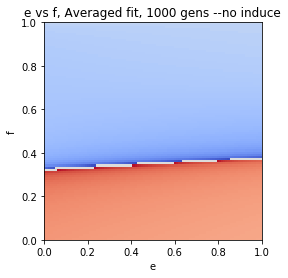

eP: 36


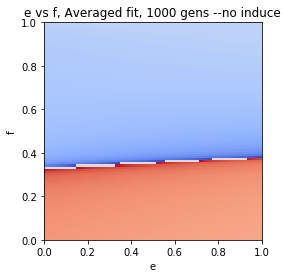

eP: 37


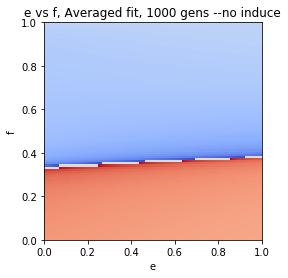

eP: 38


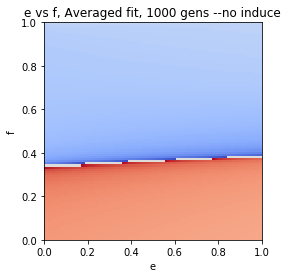

eP: 39


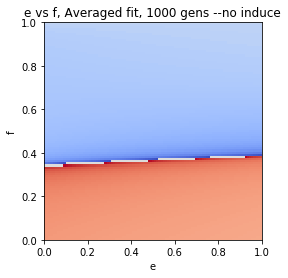

eP: 40


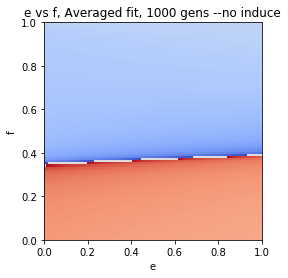

eP: 41


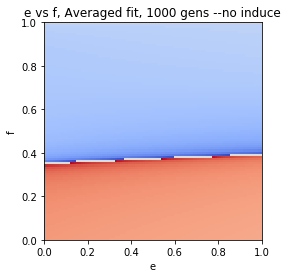

eP: 42


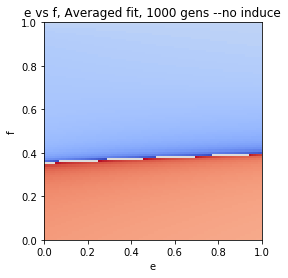

eP: 43


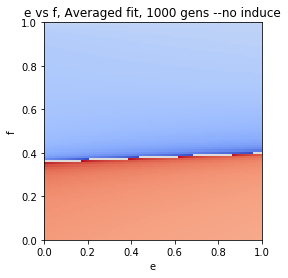

eP: 44


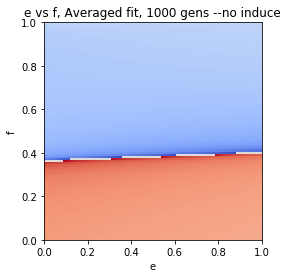

eP: 45


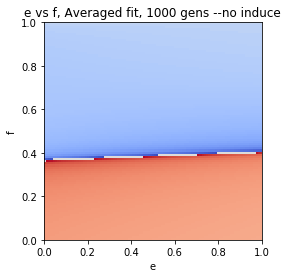

eP: 46


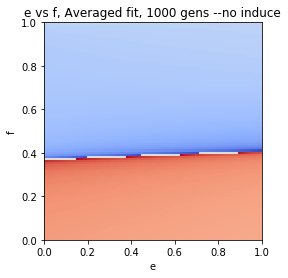

eP: 47


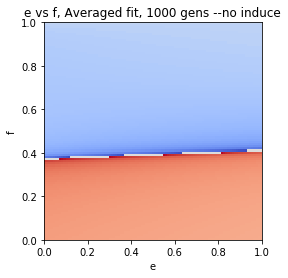

eP: 48


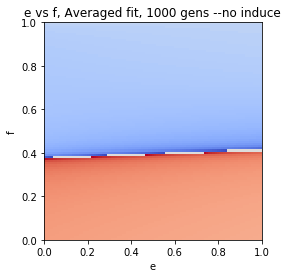

eP: 49


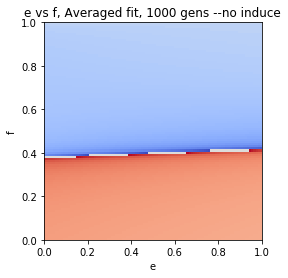

eP: 50


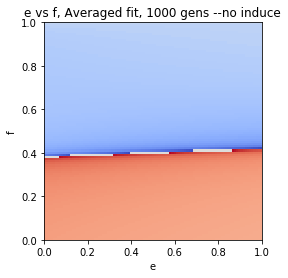

eP: 51


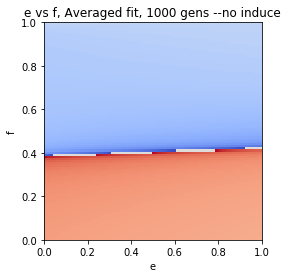

eP: 52


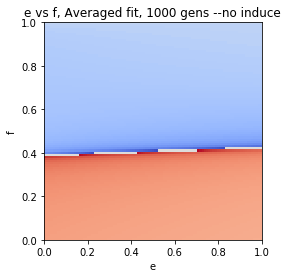

eP: 53


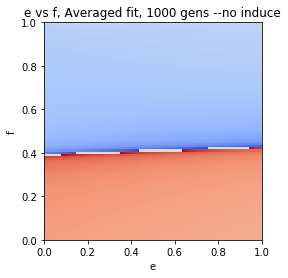

eP: 54


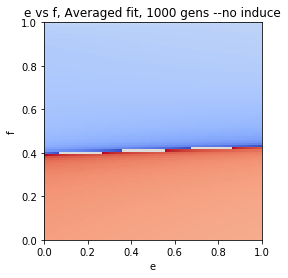

eP: 55


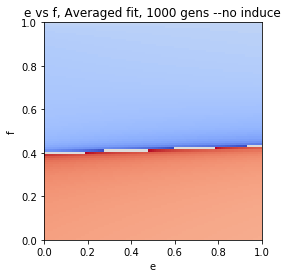

eP: 56


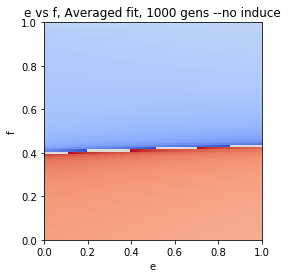

eP: 57


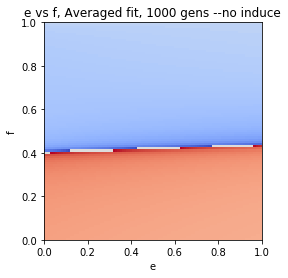

eP: 58


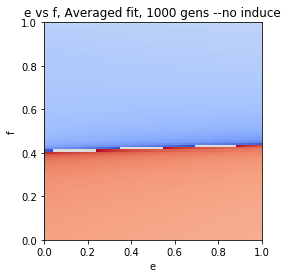

eP: 59


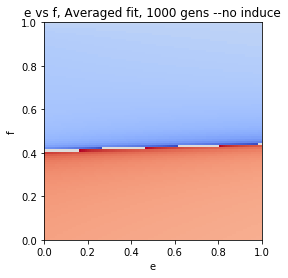

eP: 60


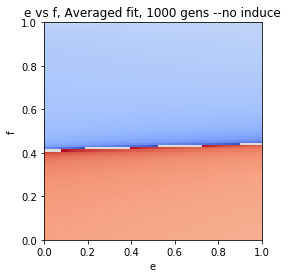

eP: 61


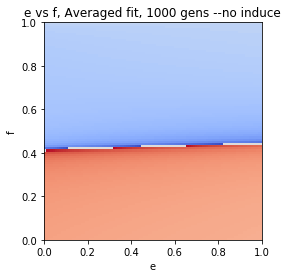

eP: 62


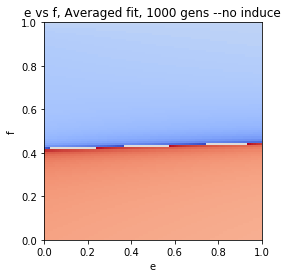

eP: 63


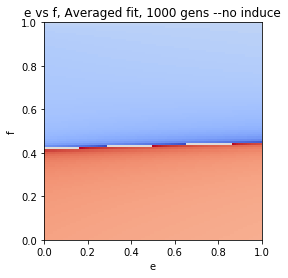

eP: 64


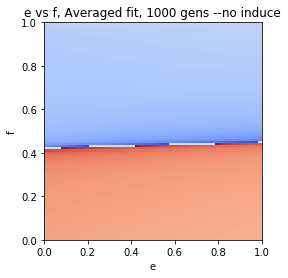

eP: 65


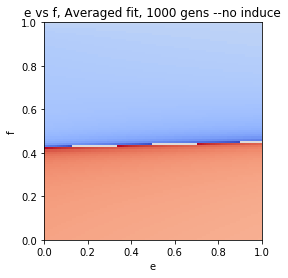

eP: 66


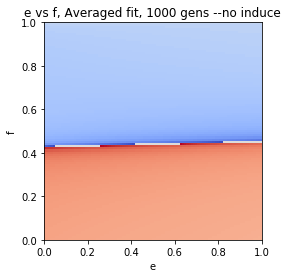

eP: 67


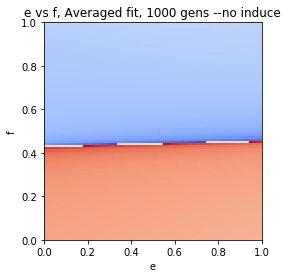

eP: 68


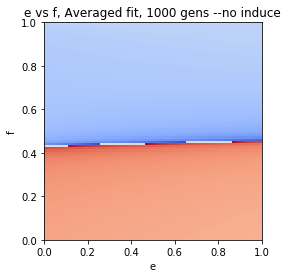

eP: 69


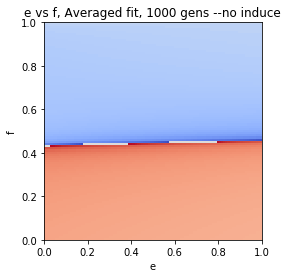

eP: 70


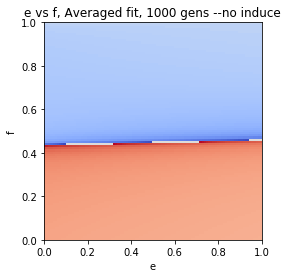

eP: 71


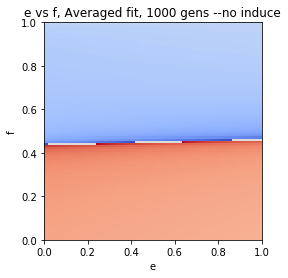

eP: 72


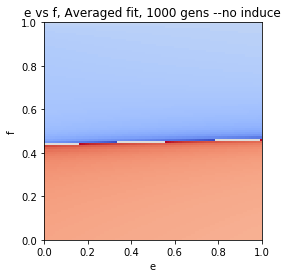

eP: 73


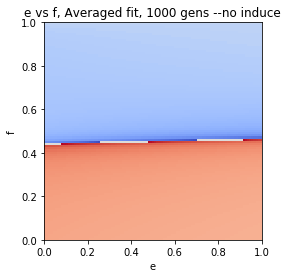

eP: 74


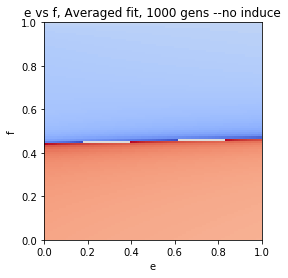

eP: 75


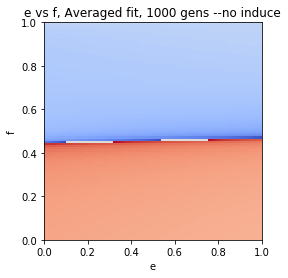

eP: 76


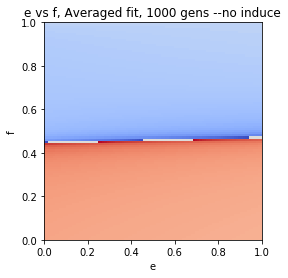

eP: 77


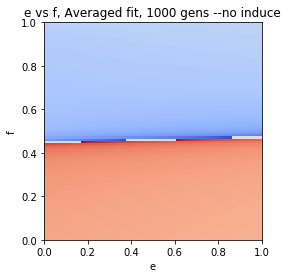

eP: 78


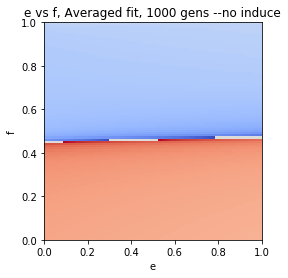

eP: 79


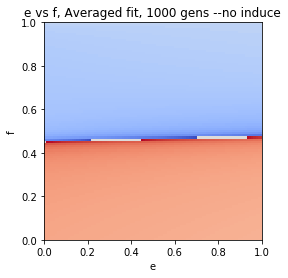

eP: 80


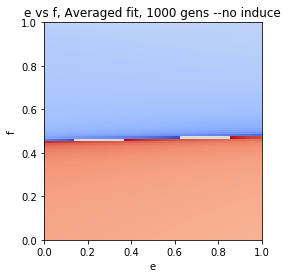

eP: 81


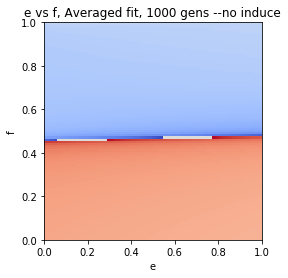

eP: 82


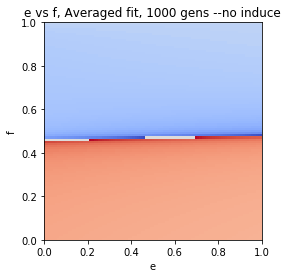

eP: 83


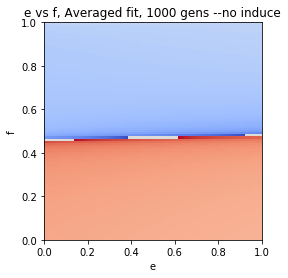

eP: 84


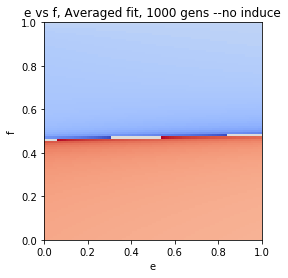

eP: 85


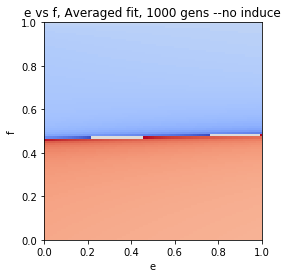

eP: 86


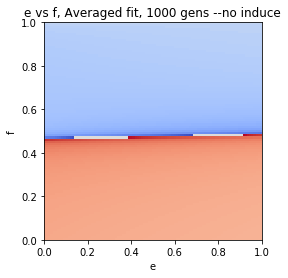

eP: 87


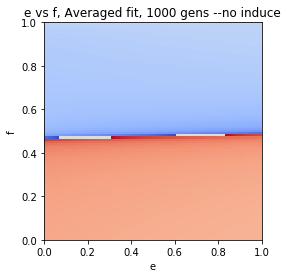

eP: 88


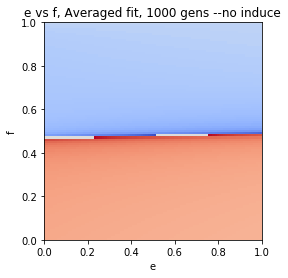

eP: 89


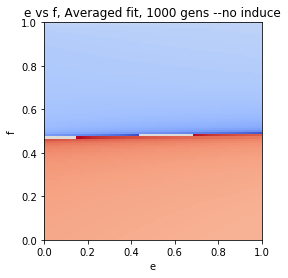

eP: 90


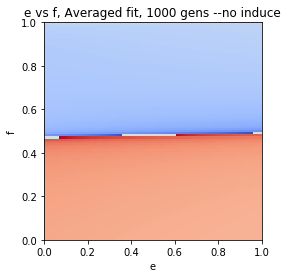

eP: 91


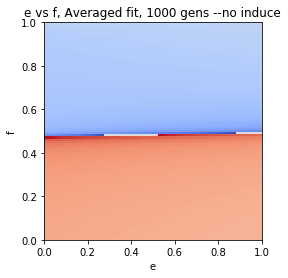

eP: 92


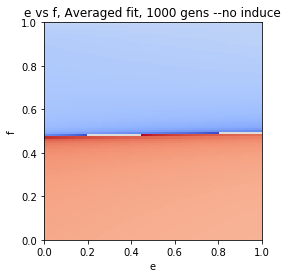

eP: 93


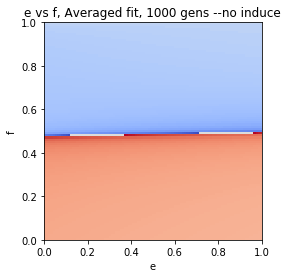

eP: 94


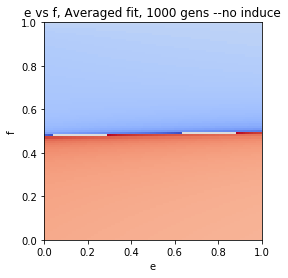

eP: 95


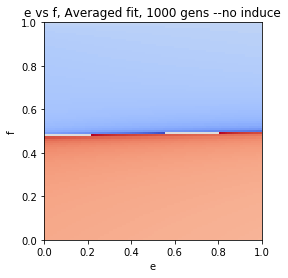

eP: 96


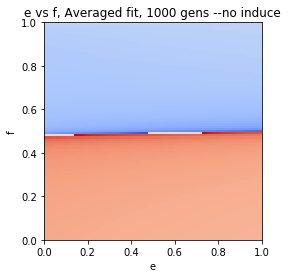

eP: 97


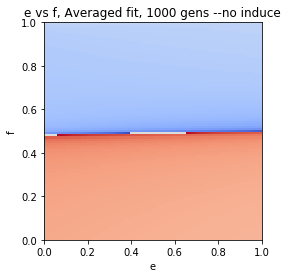

eP: 98


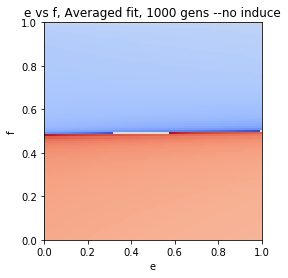

eP: 99


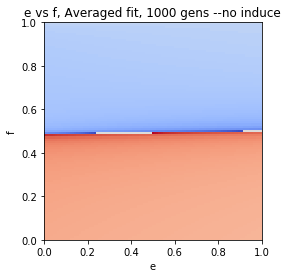

eP: 100


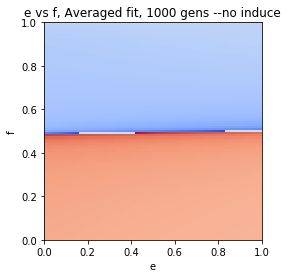

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100.]


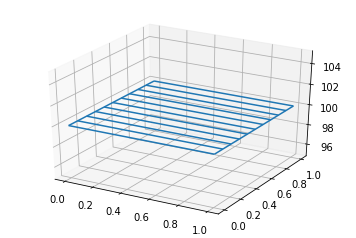

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100.]


In [6]:
xvs=np.arange(0,1.01,.01)
alphas=np.arange(0,1.01,.01)
aB,xB=np.meshgrid(alphas,xvs)
zMaxBlues=np.zeros((len(xvs),len(alphas)))


ePs=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
ePs=np.arange(0,1.01,.01)
for ePi in range(len(ePs)):
    print('eP: '+str(ePi))
    eP=ePs[ePi]
    xVals=np.arange(0,1.01,.01)
    yVals=np.arange(1,-.01,-.01)
    X,Y=np.meshgrid(xVals,yVals)
    Z=np.zeros((len(xVals),len(yVals)))
    #run 2D sim e vs f
    for xIndex in range(len(xVals)):
        #x is e
        #print('e: '+str(xVals[xIndex]))
        for yIndex in range(len(yVals)):
            #y is f
            simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':yVals[yIndex],'d':.5,'e':xVals[xIndex],'eP':eP,'a':.9,'generations':1000,'induceStart':10}

            takeover=run_simulation_iE(simData)
            Z[yIndex,xIndex]=takeover
    model3D(X,Y,Z,'e','f','e vs f, Averaged fit, 1000 gens --no induce')
    
    
    for i in range(len(Z)):
        #print(Z[i])
        col=''
        max=0
        for j in range(len(Z[i])):
            col+=str(Z[j][i])+','
            if j>max and Z[j][i]<0:
                max=j
        col+='-'
        #print(col)
        #print(max)
        zMaxBlues[ePi][i]=max

    


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


#surf = ax.plot_surface(xB, aB, zMaxBlues, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)




    


for i in range(len(zMaxBlues)):
    print(zMaxBlues[i])
    break

for i in range(len(zMaxBlues)):
    for j in range(len(zMaxBlues[0])//2):
        temp=zMaxBlues[i][j]

        zMaxBlues[i][j]=zMaxBlues[i][len(zMaxBlues[0])-1-j]
        zMaxBlues[i][len(zMaxBlues[0])-1-j]=temp
# In[35]:
zMaxBlues=np.array(zMaxBlues)
ax.plot_wireframe(aB, xB, zMaxBlues, rstride=10, cstride=100)
plt.show()

for i in range(len(zMaxBlues)):
    print(zMaxBlues[i])
    break

